# 04-EDA-TimeSeries_b

In this Notebook I will perform a statistic analysis of the cleaned dataset.


In [1]:
# log comment, warnings and errors in a specific files

from datetime import datetime
import logging
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import calendar
from pylab import rcParams
import statsmodels.api as sm

now = datetime.now()
filename = 'logs/04-EDA_timeseries-analysis' + now.strftime("%m%d%Y%H%M%S") + '.log'

logging.basicConfig(filename=filename ,format='%(asctime)s | %(levelname)s: %(message)s', level=20)
logging.info('I start to run your Notebook ! -- Good Luck :-) It is:  '+ now.strftime("%m/%d/%Y, %H:%M:%S"))

# declare some constants
folder = '_anonymized/'

# set figure size
sns.set(rc={'figure.figsize':(15,4)})
rcParams['figure.figsize'] = 11, 9

# Load the data
In the previous Notebook, I loaded the TimeSeries file and managed missing value and created the target value for my modeling process. Now it's time to analyse the data (TimeSeries).

Each row is an observation for one month (EOM) for 1 fund (FUND_NAME). The fund is classified in a CAPABILITY_STRATEGY.

The TimeSeries analysis will be done:
- by CAPABILITY STRATEGY
- for 1 specific fund

In [2]:
ts = pd.read_csv(folder + 'cleaned_time_series.csv')
logging.info('Cleaned time series loaded with {} rows and {} columns'.format(ts.shape[0],ts.shape[1]))
ts.describe()

,SRC_UID,ADMINSTRATION_FEES,MANAGEMENT_FEES,MULTI_MANAGER_STRUCTURE,EXPERIENCE,SOFTCLOSING,CNT_SHARE,QUANTITY,IN_FLOWS,OUT_FLOWS,...,SUB_FUNDS_SHARE_PARTS,SUB_FUNDS_SHARE_SIZE_SF_CCY,DOWNLOADED_DOCUMENTS,WEIGHTED,PSU_SCORE,EVENT_IMPACT,COMPUTED_FLOWS,DIFF_FLOWS,THRESHOLD,TARGET
count,9.891000e+03,9891.000000,9891.000000,9891.000000,9891.000000,9891.000000,9891.000000,9.891000e+03,9.891000e+03,9.891000e+03,...,9.891000e+03,9.891000e+03,9891.000000,9891.000000,9891.000000,9891.000000,9.891000e+03,9891.000000,9891.000000,9891.000000
mean,4.600749e+13,0.001260,0.006853,0.622991,1456.651810,0.087453,15.543221,4.985349e+06,5.929833e+07,-5.446853e+07,...,5.464346e+05,2.345571e+08,1954.483116,0.239867,1.701446,4.960466,4.829806e+06,-48.642908,0.001172,0.000809
std,8.169838e+13,0.000860,0.004493,0.484662,1042.486889,0.282512,9.185617,7.458004e+06,1.301700e+08,1.239861e+08,...,7.438361e+05,9.121905e+08,3205.051939,0.282029,1.670882,5.531666,8.138184e+07,4625.585346,0.469892,0.818516
min,2.066707e+08,0.000100,0.000200,0.000000,0.000000,0.000000,3.000000,1.000000e+02,0.000000e+00,-2.769827e+09,...,2.525244e+02,2.547355e+04,1.000000,0.000000,0.000000,0.000000,-1.391798e+09,-268507.000000,-45.599059,-1.000000
25%,2.184658e+08,0.000300,0.002500,0.000000,711.151054,0.000000,8.000000,7.531585e+05,5.459482e+06,-5.164057e+07,...,1.118584e+05,3.066674e+07,103.438202,0.000000,0.000000,0.000000,-1.032751e+07,0.000000,-0.020842,-1.000000
50%,1.054014e+11,0.001014,0.006997,1.000000,1493.978690,0.000000,14.000000,2.195047e+06,1.763231e+07,-1.738764e+07,...,2.582585e+05,6.823542e+07,841.000000,0.161000,2.000000,4.308484,-2.152600e+04,0.000000,-0.000103,0.000000
75%,1.676125e+12,0.001947,0.011500,1.000000,1962.586496,0.000000,19.000000,5.965489e+06,5.472840e+07,-5.849550e+06,...,6.705475e+05,1.581271e+08,2396.500000,0.433200,3.000000,8.749284,1.252721e+07,0.000000,0.023106,1.000000
max,2.134799e+14,0.003033,0.015667,1.000000,4456.626156,1.000000,44.000000,6.838726e+07,2.362646e+09,0.000000e+00,...,5.964950e+06,1.697842e+10,51305.000000,1.029800,5.000000,32.643325,1.942251e+09,157770.000000,1.080780,1.000000


In [3]:
ts.columns

Index(['SRC_UID', 'EOM', 'PRODUCT_STRATEGY', 'ASSET_NAME', 'FUND_NAME',
       'STRATEGY_CAPABILITY', 'IS_STRATEGIC', 'ADMINSTRATION_FEES',
       'MANAGEMENT_FEES', 'MULTI_MANAGER_STRUCTURE', 'EXPERIENCE',
       'SOFTCLOSING', 'RISK_LEVEL', 'DATE_SHARE', 'CNT_SHARE', 'QUANTITY',
       'IN_FLOWS', 'OUT_FLOWS', 'NET_FLOWS', 'AUM', 'BENCH_PERF_1_MONTH',
       'BENCH_PERF_1_YEAR', 'BENCH_PERF_3_MONTH', 'BENCH_PERF_6_MONTH',
       'BENCH_VOL_1_MONTH', 'BENCH_VOL_3_MONTH', 'BENCH_VOL_6_MONTH',
       'BENCH_VOLATILITY_1_YEAR', 'NAV_PERF_1_MONTH', 'NAV_PERF_1_YEAR',
       'NAV_PERF_3_MONTH', 'NAV_PERF_6_MONTH', 'NAV_VOL_1_MONTH',
       'NAV_VOL_3_MONTH', 'NAV_VOL_6_MONTH', 'NAV_VOLATILITY_1_YEAR',
       'BENCH_VOL_SINCE_INCEPT', 'NAV_PERF_COMPOUND_CREATION',
       'NAV_VOL_SINCE_INCEPT', 'FUND_SIZE', 'SUB_FUNDS_SHARE_PARTS',
       'SUB_FUNDS_SHARE_SIZE_SF_CCY', 'DOWNLOADED_DOCUMENTS', 'WEIGHTED',
       'COUNTRY', 'PSU', 'PSU_SCORE', 'POSITIVE_RFP', 'EVENT_IMPACT',
       'COMPUTED_

In [4]:

ts['EOM']=pd.to_datetime(ts['EOM'])
ts.dtypes

SRC_UID                                 int64
EOM                            datetime64[ns]
PRODUCT_STRATEGY                       object
ASSET_NAME                             object
FUND_NAME                              object
STRATEGY_CAPABILITY                    object
IS_STRATEGIC                           object
ADMINSTRATION_FEES                    float64
MANAGEMENT_FEES                       float64
MULTI_MANAGER_STRUCTURE                 int64
EXPERIENCE                            float64
SOFTCLOSING                           float64
RISK_LEVEL                             object
DATE_SHARE                             object
CNT_SHARE                               int64
QUANTITY                                int64
IN_FLOWS                                int64
OUT_FLOWS                               int64
NET_FLOWS                               int64
AUM                                     int64
BENCH_PERF_1_MONTH                    float64
BENCH_PERF_1_YEAR                 

# Time Series Analysis
The Time Series dataset (cleaned) contains approximatively 10K rows. Each row is an observation for a specific month of net flows for a fund with a multiple attributes from different sources such as performance, analyst research indicator, marketing indicators and funds characteristics.

At Pictet Asset Management funds are classified in different categories (classification). I will use one of them to merge data and collect series.

The Strategy Capability classifies funds in 12 categories of investment characteristics such as Thematic, Alternatives, Indexed Equities and other categories.

For each capability, I will calculate the sum of inflows, out flows and net flows. The time series analysis will be globally done on each category and a deeper analysis will be done on the Thematic classification which is one of the capabilities promoted by Pictet Asset Management actually.
Scope of the analysis:

<li />Global graph and observation for the whole dataset merged by month with the sum of inflows, out flows and net flows.
<li />Breakdown by “capabilities” and graph for the timeline and looks for special event.
<ol>
<li />Outliers’ identification at the capabilities level
<li />Seasonality with a boxplot per month for each capability
</ol>
<li />Line plot with resampling de data quarterly and yearly.
<li />For each capability, I will plot the changes over month and comment. 
<ol>
<li />by using the shift method
<li />by using the percent change method
</ol>
<li />I will plot a heatmap for global data to highlight low (high outflows) and high (important inflows) over the year by month.
<li />I will use the statsmodels decomposition method on the whole dataset to get 
<ol>
<li />the trends “Consistent upward or downward slope of a time series”
<li />the seasonality “Clear periodic pattern of a time series”
<li />the outliers “Outliers or missing values”
</ol>
Point related to <b>heatmap</b> and <b>decomposition</b> will be done for Thematic Capability as well.



## Global view on the dataset (Tiem Series)
I will merge all obeservation (inflows, out flows and net flows) by month of observation.

In [5]:
ts

,SRC_UID,EOM,PRODUCT_STRATEGY,ASSET_NAME,FUND_NAME,STRATEGY_CAPABILITY,IS_STRATEGIC,ADMINSTRATION_FEES,MANAGEMENT_FEES,MULTI_MANAGER_STRUCTURE,...,COUNTRY,PSU,PSU_SCORE,POSITIVE_RFP,EVENT_IMPACT,COMPUTED_FLOWS,CHECKED,DIFF_FLOWS,THRESHOLD,TARGET
0,206670688,2010-01-31,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.000000,-131827306,False,-1,-0.186680,-1.0
1,206670688,2010-02-28,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.000000,15097645,True,0,0.020925,1.0
2,206670688,2010-03-31,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.000000,-95518684,True,0,-0.152568,-1.0
3,206670688,2010-04-30,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,1.000000,17638095,True,0,0.027399,1.0
4,206670688,2010-05-31,Cyrtodactylus louisiadensis,Dusicyon thous,Oreamnos americanus,Money Market,No,0.000277,0.001631,1,...,0,0,0.0,False,0.000000,-66598477,True,0,-0.115363,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,213479867994200,2020-09-30,Ara chloroptera,Phasianus colchicus,Paradoxurus hermaphroditus,Multi Asset,Yes,0.000300,0.005000,0,...,0,0,0.0,False,8.783467,7200259,True,0,0.014449,1.0
9887,213479867994200,2020-10-31,Ara chloroptera,Phasianus colchicus,Paradoxurus hermaphroditus,Multi Asset,Yes,0.000300,0.005000,0,...,0,0,0.0,False,3.779576,13760937,True,0,0.026388,1.0
9888,213479867994200,2020-11-30,Herpestes javanicus,Phasianus colchicus,Paradoxurus hermaphroditus,Multi Asset,Yes,0.000300,0.005000,0,...,0,0,0.0,False,5.107324,24142098,True,0,0.042117,1.0
9889,213479867994200,2020-12-31,Herpestes javanicus,Phasianus colchicus,Paradoxurus hermaphroditus,Multi Asset,Yes,0.000300,0.005000,0,...,0,0,0.0,False,5.554061,43657986,True,0,0.068425,1.0


In [6]:
ts_global = ts.loc[:,['EOM','IN_FLOWS','OUT_FLOWS','NET_FLOWS']].copy()
ts_global = ts_global.groupby('EOM').sum()
#ts_global.set_index('EOM', inplace=True)
ts_global.head()

,IN_FLOWS,OUT_FLOWS,NET_FLOWS
EOM,,,
2010-01-31,4276148813,-4181445063,94703750
2010-02-28,4458423978,-3512778035,945645943
2010-03-31,5155526718,-3688700347,1466826371
2010-04-30,7011850567,-4228377974,2783472593
2010-05-31,4930717952,-5171971819,-241253867


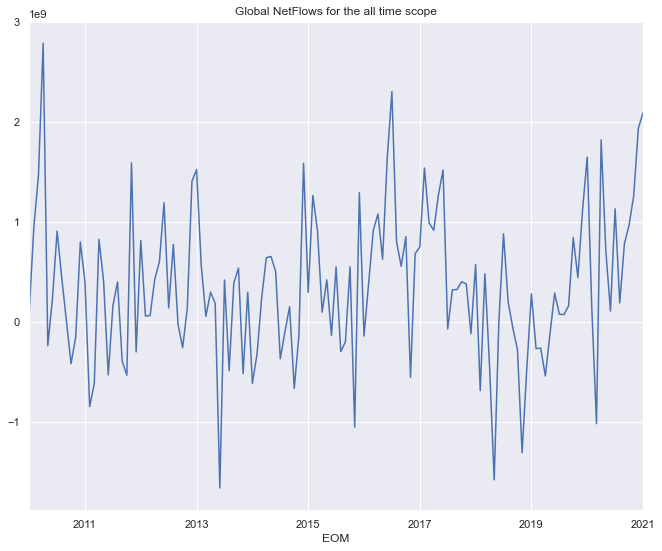

In [7]:

ts_global['NET_FLOWS'].plot()
plt.title('Global NetFlows for the all time scope')
plt.show();

<b>As we can observe on the graph there is no clear seasonality in the  global flows. We can observe a few high inflows in 2010 and in 2016 and some drop of investment inn 201, 2018 and in 2020.</b>

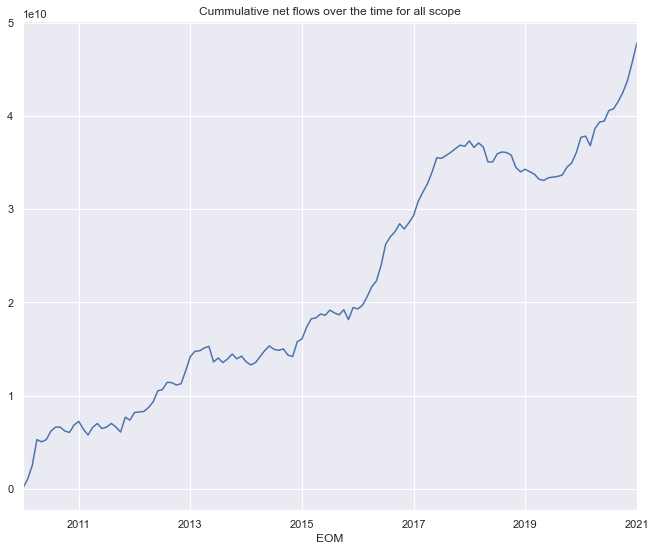

In [8]:
ts_global['NET_FLOWS'].cumsum().plot()
plt.title('Cummulative net flows over the time for all scope')
plt.show();

<b>We can observe a trend as the total of net flows inscrease over the time</b>

Definition
- Level: The base value for the series if it were a straight line.
- Trend: The linear increasing or decreasing behavior of the series over time.
- Seasonality: The repeating patterns or cycles of behavior over time.
- Noise: The variability in the observations that cannot be explained by the model.

[Source: https://medium.com/swlh/time-series-analysis-7006ea1c3326#:~:text=Components%20of%20Time%20Series&text=Trend%3A%20The%20linear%20increasing%20or,be%20explained%20by%20the%20model.]

### Monthly seasonality and outliers (global) detection
I will plot a chart (box plot) by grouing observation per month over the time and plot for in, out and net flows.

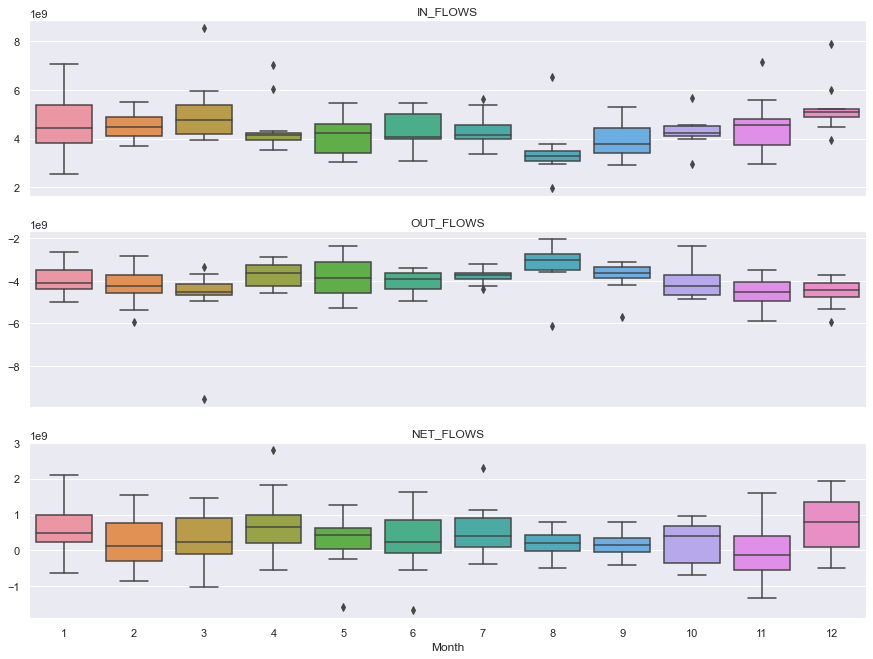

In [9]:
ts_global['Month']=ts_global.index.month
ts_global['Year']=ts_global.index.year
fig, axes = plt.subplots(3, 1, figsize=(15, 11), sharex=True)
for name, ax in zip(['IN_FLOWS', 'OUT_FLOWS', 'NET_FLOWS'], axes):
    sns.boxplot(data = ts_global, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')


### Global observation of previous chart
- in August in flows are lower and out flows are higher
- after the summer inflows trend increase and outflows trend decrease
- globaly the net flows remains stable, except in December

### Outliers detection
They are a few outliers which I will need to deal with. Outliers are present in in flows and out flows almost every month, but in net flow I can observe outliers from April to July.

## PRODUCT CLASSIFICATION
The landscape of the funds proposed to investor is classifed in different catgories. The dataset contains different fields for classification. A classification shows the scope of funds on a specific angle.

- PRODUCT_STRATEGY
- ASSET_NAME
- STRATEGY_CAPABILITY

These are differents views of the funds.

In [10]:
# count the number of unique value by classification
classification = ['PRODUCT_STRATEGY','ASSET_NAME','STRATEGY_CAPABILITY']
count_classif = {}
for classif in classification:
    count_classif[classif] = ts[classif].nunique()
    
count_classif

{'PRODUCT_STRATEGY': 52, 'ASSET_NAME': 71, 'STRATEGY_CAPABILITY': 12}

## Graph by funds Breakdown
I will work with the <b>STRATEGY_CAPABILITY</b> classification and merge data by taking the sum() of flows for each period (month) to have a final series for analysis.

In [11]:
# show list of capabilities
ts.loc[:,['STRATEGY_CAPABILITY','SRC_UID']].groupby('STRATEGY_CAPABILITY').count()

,SRC_UID
STRATEGY_CAPABILITY,
Absolute Return,459
Active Quant,337
Alternatives,133
Core & Specialist Equities,776
Core Bonds,792
Credit,769
Emerging Markets,2092
Indexed Equities,931
Money Market,1271


## Time Series classification
The Time Series dataset (cleaned) contains approximatively 10K rows. Each row is an observation for a specific month of net flows for a fund with a multiple attribute from different sources such as performance, analyst research indicator, marketing indicators and funds characteristics.

At Pictet Asset Management funds are classified in different categories (classification). I will use one of them to merge data and collect series.

The Strategy Capability classifies funds in 12 categories of investment characteristics such as Thematic, Alternatives, Indexed Equities and other categories.

For each capability, I will calculate the sum of inflows, out flows and net flows. The time series analysis will be globally done on each categories and a deeper analysis will be done on the Thematic classification which is one of the capabilities promoted by Pictet Asset Management actually.


In [12]:
ts_subset = ts[['STRATEGY_CAPABILITY','EOM','IN_FLOWS','OUT_FLOWS','NET_FLOWS']].copy()
ts_subset = ts_subset.groupby(['STRATEGY_CAPABILITY','EOM']).sum()
ts_subset.shape

(1540, 3)

In [13]:
ts_subset.reset_index(inplace=True)
ts_subset.set_index('STRATEGY_CAPABILITY', inplace=True)
capabilities=np.unique(ts_subset.index.tolist())
len(capabilities)
logging.info(capabilities)
ts_subset.reset_index(inplace=True)

ts_subset.head()

,STRATEGY_CAPABILITY,EOM,IN_FLOWS,OUT_FLOWS,NET_FLOWS
0,Absolute Return,2010-04-30,217226220,-77548,217148672
1,Absolute Return,2010-05-31,56623839,-1609050,55014789
2,Absolute Return,2010-06-30,7023398,-3162127,3861271
3,Absolute Return,2010-07-31,37341234,-5711227,31630007
4,Absolute Return,2010-08-31,5503091,-7966996,-2463905


In [14]:
# create a pivot table to prepare for plot
t_pivot = ts_subset.pivot_table(values='NET_FLOWS', index='EOM', columns='STRATEGY_CAPABILITY')
t_pivot['month']=t_pivot.index.month
t_pivot.columns

Index(['Absolute Return', 'Active Quant', 'Alternatives',
       'Core & Specialist Equities', 'Core Bonds', 'Credit',
       'Emerging Markets', 'Indexed Equities', 'Money Market', 'Multi Asset',
       'Other', 'Thematic', 'month'],
      dtype='object', name='STRATEGY_CAPABILITY')

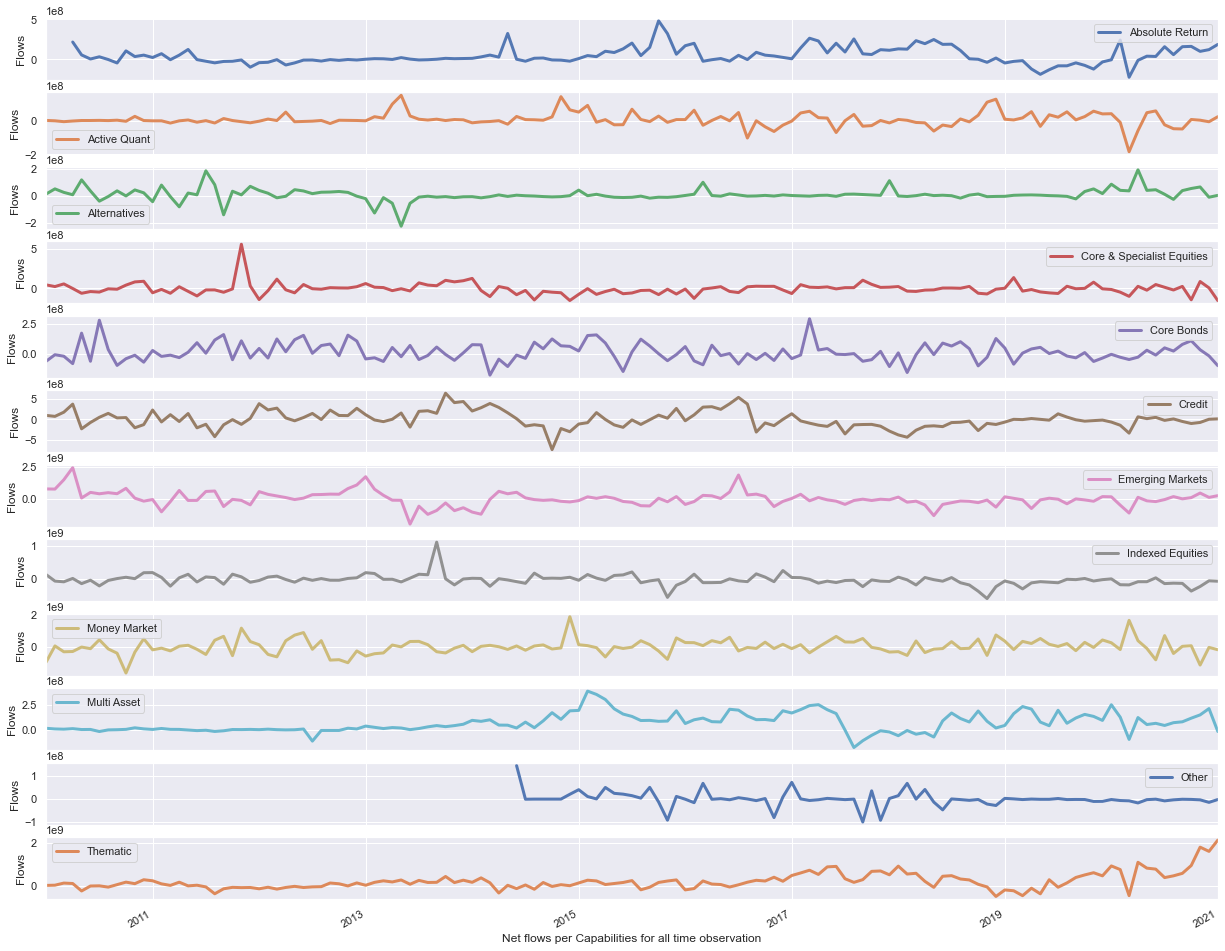

In [15]:
# plot the pivot table in a subplot graph to see the trends
cols_plot = t_pivot.columns.tolist()
cols_plot.remove('month')
axes = t_pivot[cols_plot].plot(alpha=0.95, linestyle='-', linewidth=3, figsize=(21, 18), subplots=True)

 
for ax in axes:
    ax.set_ylabel('Flows')
    
ax.set_xlabel('Net flows per Capabilities for all time observation')


plt.show();

### Observation
There is a lot of information on the previous chart. The <b>net flows</b> go up and down for last 10 years. Some capabilities got high net inflows as the <i>Core & Specialist Equities</i> late in 2011. We can see the <b>COVID</b> effect last year (begining) where a lot of out flows from many capabilities and the switch to a more secure capabilty such as the <b>Money Market</b>.

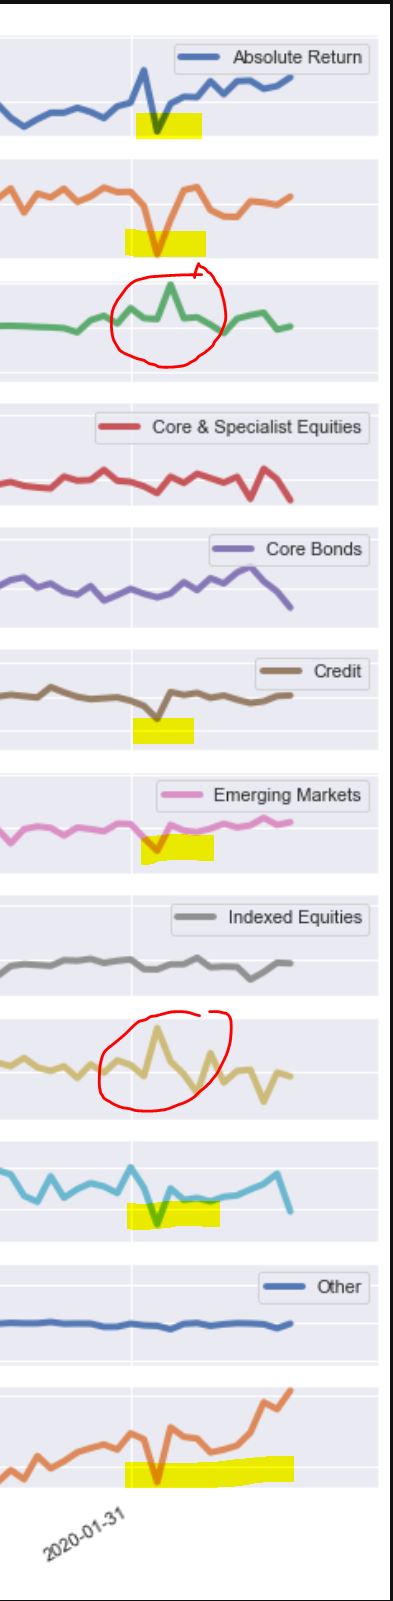

### Cummulative net flows per capabilities

The next chart is a cummulative net flows per capailities. Some capabilities such as Absolute Return, Aléternatives, Multi Asset or Thematics get a increase trends. In opposite we can observe the decrease trends for the Indexed Equities capabilities.

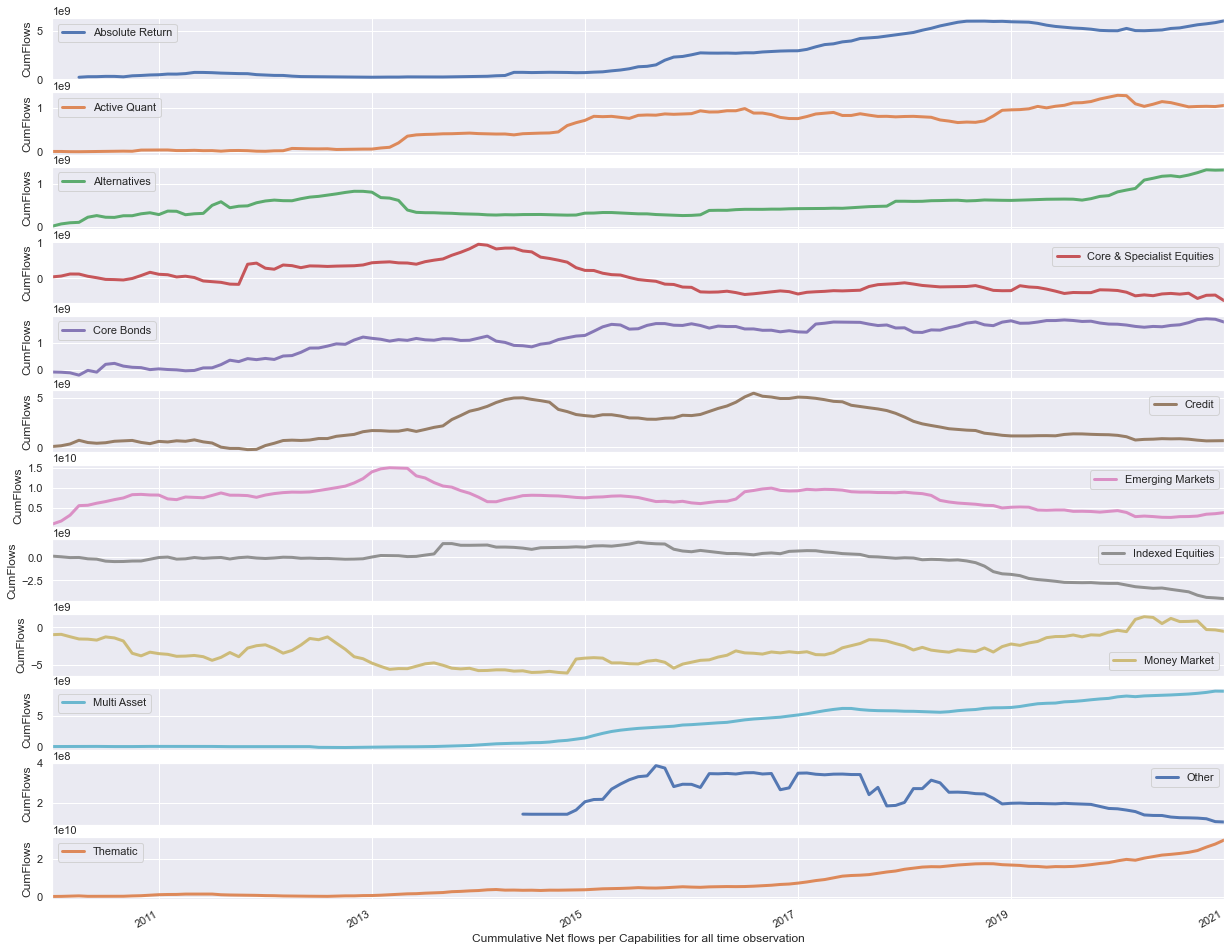

In [16]:
# plot the pivot table in a subplot graph to see the trends
logging.info('plot the pivot table in a subplot graph to see the trends')
cols_plot = t_pivot.columns.tolist()
cols_plot.remove('month')
axes = t_pivot[cols_plot].cumsum().plot(alpha=0.95, linestyle='-', linewidth=3, figsize=(21, 18), subplots=True)
for ax in axes:
    ax.set_ylabel('CumFlows')
    
ax.set_xlabel('Cummulative Net flows per Capabilities for all time observation')
plt.show();

## DECOMPOSITION
Now I will work with statsmodel and decmpose method to highlight <b>trend, seasonality and noise</b> of the global time series (all observation grouped by month) and of the capabilities (observations grouped by capabilities and month).

In [17]:
ts_global.head()

,IN_FLOWS,OUT_FLOWS,NET_FLOWS,Month,Year
EOM,,,,,
2010-01-31,4276148813,-4181445063,94703750,1,2010
2010-02-28,4458423978,-3512778035,945645943,2,2010
2010-03-31,5155526718,-3688700347,1466826371,3,2010
2010-04-30,7011850567,-4228377974,2783472593,4,2010
2010-05-31,4930717952,-5171971819,-241253867,5,2010


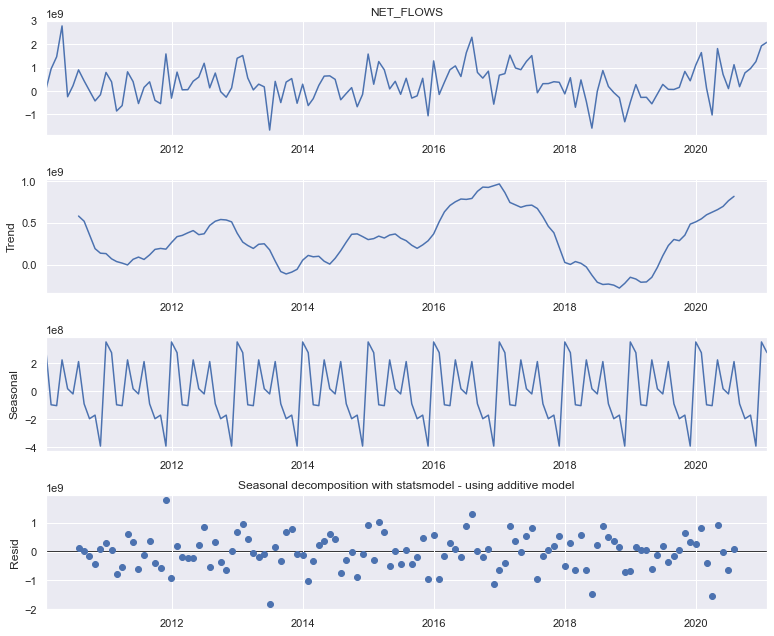

In [18]:
rcParams['figure.figsize'] = 11, 9
# using the decompse method from statsmodel.
# by reading the litterature it's a naive representation but popular
# "Though the documentation for decomposition itself says that it’s a very naive representation but it is still popular"
logging.info('*** Though the documentation for decomposition itself says that it’s a very naive representation but it is still popular ***')
decomposition = sm.tsa.seasonal_decompose(ts_global['NET_FLOWS'], model='Additive')
fig = decomposition.plot()
plt.title('Seasonal decomposition with statsmodel - using additive model')
plt.show()

## Comments on decomposition
There is no specif trends such as constant increase or decrease but moving up and down. We can observe a seasonality which is logical in investor behaviour.

## Heatmap visualization
I will plot a calendar of the global netflows and observe very high Vs. very low flows.

In [19]:
ts_global

,IN_FLOWS,OUT_FLOWS,NET_FLOWS,Month,Year
EOM,,,,,
2010-01-31,4276148813,-4181445063,94703750,1,2010
2010-02-28,4458423978,-3512778035,945645943,2,2010
2010-03-31,5155526718,-3688700347,1466826371,3,2010
2010-04-30,7011850567,-4228377974,2783472593,4,2010
2010-05-31,4930717952,-5171971819,-241253867,5,2010
...,...,...,...,...,...
2020-09-30,4532383805,-3754078379,778305426,9,2020
2020-10-31,5646544109,-4682021165,964522944,10,2020
2020-11-30,7159573940,-5900100827,1259473113,11,2020


In [20]:
# create a calendar based on a pivot table with NetFlows and month on the Y-axis and years as columns
logging.info('Create the calendar for heatmap plot')
all_month_year_df = pd.pivot_table(ts_global, values='NET_FLOWS',
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
# drop 2021 because all value are not completed
all_month_year_df.drop(2021, axis=1, inplace=True)
# I divide the value of the table to get a understable indicators.
all_month_year_df=(all_month_year_df/100000000)
logging.info(all_month_year_df)
all_month_year_df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
Jan,0.947037,3.962310,8.109537,15.199302,-6.183845,2.925402,-1.447879,7.457481,5.717144,2.779611,16.452086,6.399668
Feb,9.456459,-8.505455,0.550437,5.606375,-3.221047,12.617011,3.788223,15.355749,-6.909036,-2.695134,1.200332,2.476719
Mar,14.668264,-6.184232,0.615377,0.519487,2.420376,9.083013,9.137952,9.876629,4.776940,-2.656573,-10.208656,2.913507
Apr,27.834726,8.236707,4.222936,2.962449,6.391926,0.938636,10.757526,9.128646,-4.443544,-5.441198,18.169535,7.159850
May,-2.412539,4.042974,5.982275,1.808017,6.511772,4.178959,6.227438,12.664520,-15.830858,-1.194039,7.121400,2.645447
Jun,2.289441,-5.327903,11.885972,-16.650734,5.009516,-1.373186,16.368771,15.155398,-0.105395,2.853502,1.053244,2.832602
Jul,9.056189,1.569805,1.372377,4.155235,-3.719333,5.471280,22.996243,-0.728163,8.777232,0.747320,11.281742,5.543630
Aug,4.371147,3.965028,7.710881,-4.915599,-1.021417,-2.994898,7.975662,3.163541,1.970086,0.693232,1.870843,2.071682
Sep,0.125364,-3.961922,-0.240155,3.847802,1.484042,-2.036045,5.532938,3.207883,-0.627388,1.580645,7.783054,1.517838
Oct,-4.208154,-5.371645,-2.616678,5.351820,-6.689427,5.472902,8.501823,3.994289,-2.798257,8.404084,9.645229,1.789635


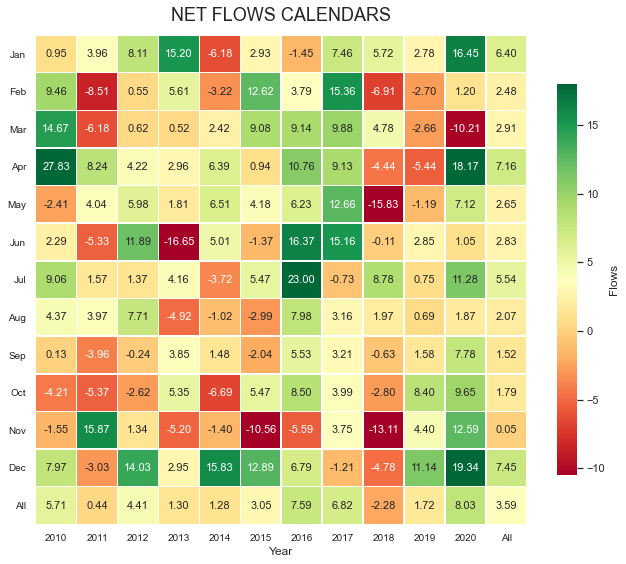

In [21]:
logging.info('Ploting the heatmap with the calendar')
ax = sns.heatmap(all_month_year_df, cmap='RdYlGn', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Flows'})                       

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('NET FLOWS CALENDARS', fontdict={'fontsize':18},    pad=14);

## Comment on HeatMap plot
This plot is very intersting because it shows by color intensity. Dark red means a high volume of out flows and dark green indicates a high volume of in flows. The biggest volume of net flows was in 2010, in April and the highest out flows was in 2013 and 2018. We can observe that in 2020it has been an important outflowsat the begning f the pandemic in Europe but covered by 3 months with higher inflows.

Globally, 2018 was not a good year for net flows but in an average (last colum - All) the inflows are constant which is confirmed by the general trend.

# "Thematics" Analysis
Thematics capabilities is very trendy for investor. Pictet Asset Management built a strong expertise in this area and launched a lot of good innovative funds such as the Water Fund early in 1990 and more recently some funds related to the Human or the Health.

In the next step of analyis, I will scope to the Thematics funds and perform some analysis as I did for the global flows.

In [22]:
f = ts['STRATEGY_CAPABILITY']=='Thematic'
ts_theme = ts.loc[f,:].copy()
ts_theme.set_index('EOM', inplace=True)
ts_theme['Month']=ts_theme.index.month
ts_theme['Year']=ts_theme.index.year
ts_theme

,SRC_UID,PRODUCT_STRATEGY,ASSET_NAME,FUND_NAME,STRATEGY_CAPABILITY,IS_STRATEGIC,ADMINSTRATION_FEES,MANAGEMENT_FEES,MULTI_MANAGER_STRUCTURE,EXPERIENCE,...,PSU_SCORE,POSITIVE_RFP,EVENT_IMPACT,COMPUTED_FLOWS,CHECKED,DIFF_FLOWS,THRESHOLD,TARGET,Month,Year
EOM,,,,,,,,,,,,,,,,,,,,,
2010-01-31,206670694,Felis wiedi or Leopardus weidi,Melophus lathami,Marmota flaviventris,Thematic,Yes,0.002382,0.012529,1,2423.388605,...,3.0,False,0.000000,1803970,True,0,0.035194,1.0,1,2010
2010-02-28,206670694,Felis wiedi or Leopardus weidi,Melophus lathami,Marmota flaviventris,Thematic,Yes,0.002382,0.012529,1,2423.388605,...,3.0,False,0.000000,3482734,True,0,0.064138,1.0,2,2010
2010-03-31,206670694,Felis wiedi or Leopardus weidi,Melophus lathami,Marmota flaviventris,Thematic,Yes,0.002382,0.012529,1,2423.388605,...,3.0,False,0.000000,12311787,True,0,0.169188,1.0,3,2010
2010-04-30,206670694,Felis wiedi or Leopardus weidi,Melophus lathami,Marmota flaviventris,Thematic,Yes,0.002382,0.012529,1,2423.388605,...,3.0,False,1.000000,7393057,False,-1,0.092507,1.0,4,2010
2010-05-31,206670694,Felis wiedi or Leopardus weidi,Melophus lathami,Marmota flaviventris,Thematic,Yes,0.002382,0.012529,1,2423.388605,...,3.0,False,0.000000,-117922,True,0,-0.001566,0.0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-30,203221423898215,Upupa epops,Priodontes maximus,Ourebia ourebi,Thematic,Yes,0.002485,0.013350,1,419.109915,...,4.0,False,8.783467,18974658,True,0,0.002806,0.0,9,2020
2020-10-31,203221423898215,Galago crassicaudataus,Priodontes maximus,Ourebia ourebi,Thematic,Yes,0.002485,0.013350,1,419.109915,...,4.0,False,3.779576,-29188445,True,0,-0.004289,0.0,10,2020
2020-11-30,203221423898215,Ara chloroptera,Priodontes maximus,Ourebia ourebi,Thematic,Yes,0.002485,0.013350,1,419.109915,...,4.0,True,5.107324,111983228,True,0,0.013959,1.0,11,2020


I like the heatmap view because it shows the calendar and the trends of net flows. I will create this plot to have a clear view of the investment in Thematics capabilities.

In [23]:
logging.info('Create the calendar for heatmap plot')
all_month_year_df = pd.pivot_table(ts_theme, values='NET_FLOWS',
                                   index=["Month"],
                                   columns=["Year"],
                                   fill_value=0,
                                   margins=True)
named_index = [[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(all_month_year_df.index)]] # name months
all_month_year_df = all_month_year_df.set_index(named_index)
# drop 2021 because all value are not completed
all_month_year_df.drop(2021, axis=1, inplace=True)
# I divide the value of the table to get a understable indicators.
all_month_year_df=(all_month_year_df/1000000)
logging.info(all_month_year_df)
all_month_year_df

Year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,All
Jan,3.078491,20.376362,-10.442407,3.135906,14.488047,12.162594,-13.543965,37.551909,70.947047,-13.685944,71.579141,31.217022
Feb,4.082210,8.526082,-4.473971,14.367394,31.575262,22.613105,-8.820418,46.584722,42.718081,-16.648691,58.596350,18.545979
Mar,13.827606,2.616358,-11.619289,20.258270,12.744124,19.837268,18.226911,56.354033,45.442796,-34.092789,-33.961645,9.925317
Apr,11.879536,14.988478,-5.306710,15.873406,-26.769025,5.980078,7.136328,41.376993,16.758832,-7.521025,84.508098,15.002667
May,-20.535888,0.791704,-0.986846,23.465131,3.041753,10.079825,5.520867,68.186480,-4.564300,-27.578893,63.696770,11.611736
Jun,0.322110,3.292408,-5.565362,7.068230,-9.766610,13.818035,-3.349471,69.939295,34.880144,22.522611,60.258772,18.418906
Jul,1.052842,-3.175542,-3.057879,21.932476,4.205822,21.054379,4.525810,26.025214,36.987640,-4.143419,30.141015,12.640174
Aug,-4.391341,-29.625366,-2.218501,13.854064,-12.237653,-14.310300,13.702294,13.191028,25.119972,11.298773,36.377179,5.244135
Sep,5.399807,-10.436409,11.801153,14.470368,13.707960,-4.416742,20.546206,22.852238,21.810107,30.547645,45.184338,16.047741
Oct,15.191461,-4.913190,8.838043,36.941909,-1.481018,12.891022,17.987448,52.302139,6.402631,39.606812,73.047248,23.797184


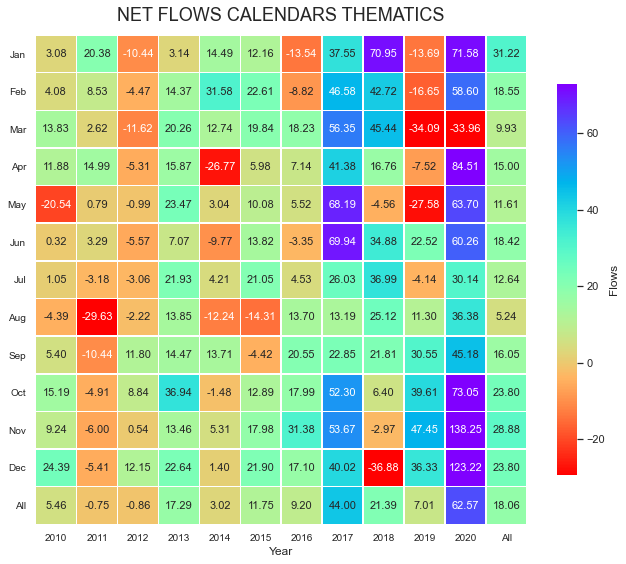

In [24]:
logging.info('Ploting the heatmap with the calendar for thematics')
ax = sns.heatmap(all_month_year_df, cmap='rainbow_r', robust=True, fmt='.2f', 
                 annot=True, linewidths=.5, annot_kws={'size':11}, 
                 cbar_kws={'shrink':.8, 'label':'Flows'})                       

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('NET FLOWS CALENDARS THEMATICS', fontdict={'fontsize':18},    pad=14);

## Observation on Thematics Heatmap
Thematics was all the time attractive capabilities for investor except at few month such as in March 2020 (pandemic), But we can observe a real posive trends since 2015. Investor looks to be more attracted after summer when the lobal indicator ('all' column) is over 20 [computed indicatr] average.

## Use Statsmodel Decompose on the Thematics

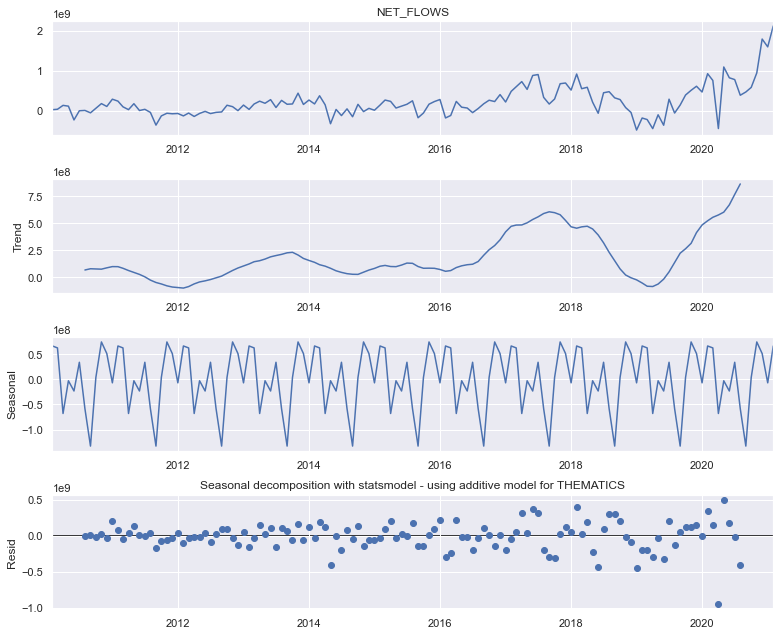

In [25]:
rcParams['figure.figsize'] = 11, 9
ts_theme.reset_index(inplace=True)
ts_theme = ts_theme.loc[:,['EOM','NET_FLOWS']].groupby('EOM').sum()
# using the decompse method from statsmodel.
# by reading the litterature it's a naive representation but popular
# "Though the documentation for decomposition itself says that it’s a very naive representation but it is still popular"
logging.info('*** Though the documentation for decomposition itself says that it’s a very naive representation but it is still popular ***')
decomposition = sm.tsa.seasonal_decompose(ts_theme['NET_FLOWS'], model='Additive')
fig = decomposition.plot()
plt.title('Seasonal decomposition with statsmodel - using additive model for THEMATICS')
plt.show()

### Observation on decomposition of Thematics net flows
We can observe a increasing trends but but some decreaing period such in 2018 and 2019. Seasonality looks as thge same as the global decomposition.

## Autocorrelation plots
As we learn we can identify correlation between variables with a rank from -1 to +1. Zero indicates no correlation, -1 a negative correlation and +1 a positive correation where 2 variables are go mutually in the same direction.

The <b>autocorrelation plot</b> in a Time Series can show relation with a lag (=1 in my example).

I will plot this graph on the global dataset (<i>recall: it's the group by EOM with sum on Net Flows</i>).

In [26]:
# pd.plotting.autocorrelation_plot?

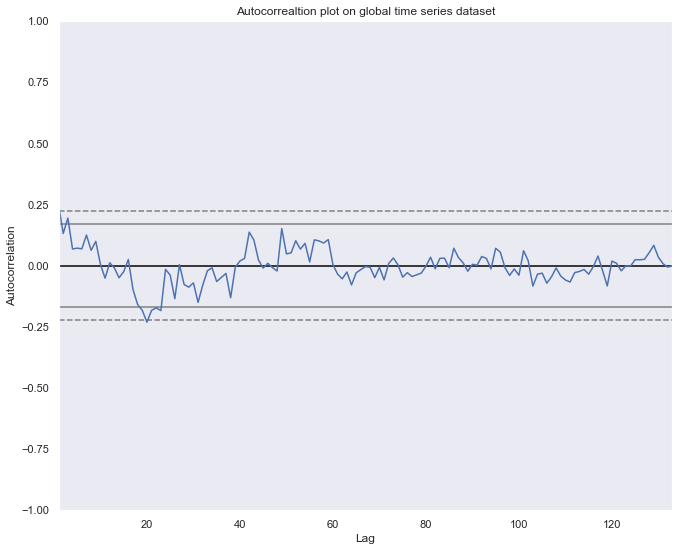

In [27]:
pd.plotting.autocorrelation_plot(ts_global['NET_FLOWS'])
plt.title('Autocorrealtion plot on global time series dataset')
ax=plt.gca()
plt.show()

logging.info('Autocorrelation ploted')

### Autocorrelation Plot Observation
The x-axis is the lag applied and the y-axis is the value of the correlation. The score remains between <b>-0.25</b> and <b>+0.25</b> and after lag value = <b>60</b> the correlation remain close to 0 (this means no correlation). I will use this indicators when resampling the time series. Correlation value are are higher at the begining of the lag value, close to 20 (negative correlation) until 60.

The global plot doesn't show a strong seasonality but at least some signs.

In [28]:
# top 5 correlation (in abs value) calculated by the Autocorrelation function
line = ax.lines[5]
pd.DataFrame(np.abs(line.get_ydata()) ).sort_values(0, ascending=False).head(5)

,0
0,0.246451
19,0.230929
2,0.194581
22,0.183658
20,0.182498
